UNAD

Juan Daniel Aragón Rodríguez

Grupo: 202016908_76

hierarchical clustering

Pasos de la Actividad

1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

4 Entrenar el modelo configurando los diferentes hiperparámetros

5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

6 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

7 Interpretar, analizar y documentar los resultados obtenido.

Cargar en GitHub los códigos de los modelos diseñados
https://github.com/



In [16]:

 # 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [31]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Cargamos el dataset para que despliegue las primeras 10 filas 
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [22]:
# Se puede ver la vista general y  verificar que no hay valores nulos
print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())  

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

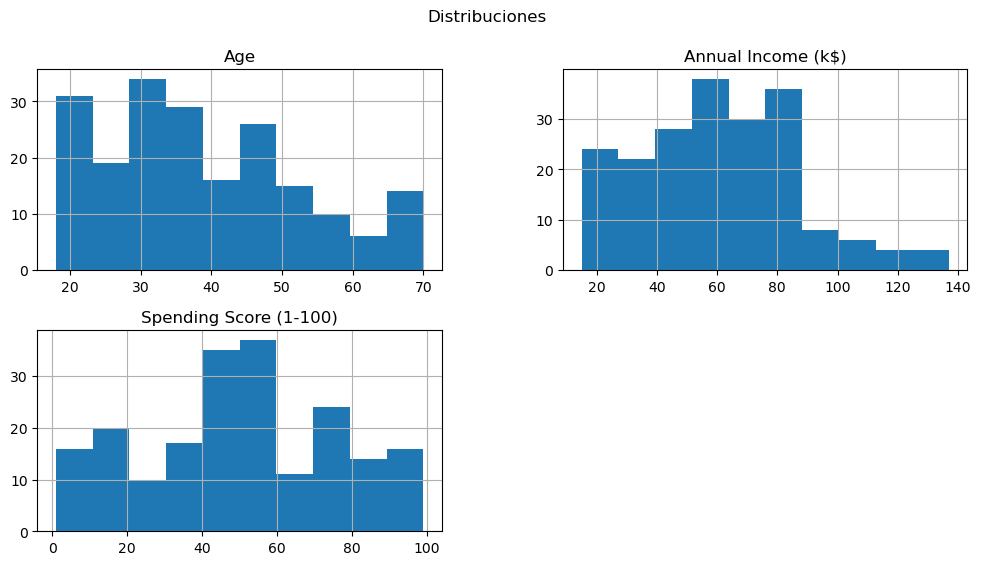

In [23]:
# Se hacen las distribuciones.
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=10, figsize=(12, 6))
plt.suptitle("Distribuciones")
plt.show()

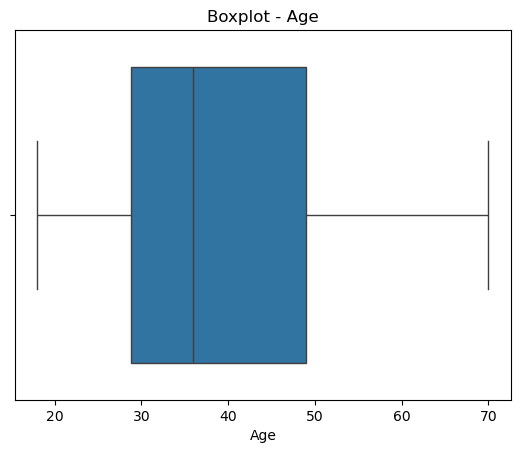

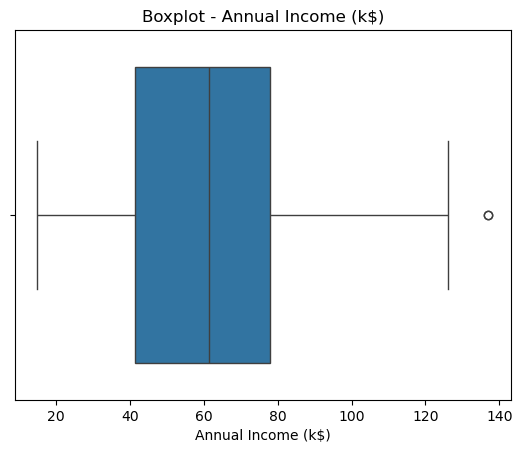

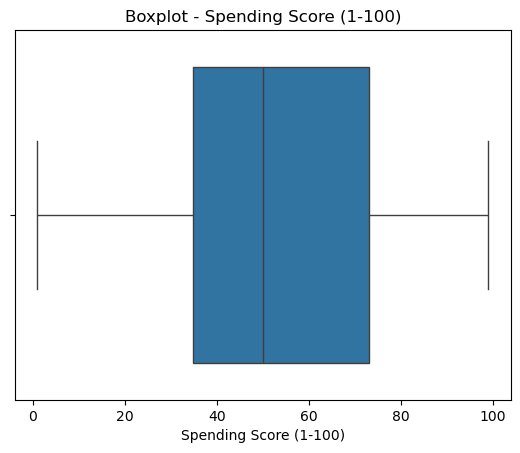

In [58]:
# Boxplots para detectar si los datos estan balanceados.
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(data=dataset, x=col)
    plt.title(f"Boxplot - {col}")
    plt.show()


In [67]:
print(dataset.columns)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


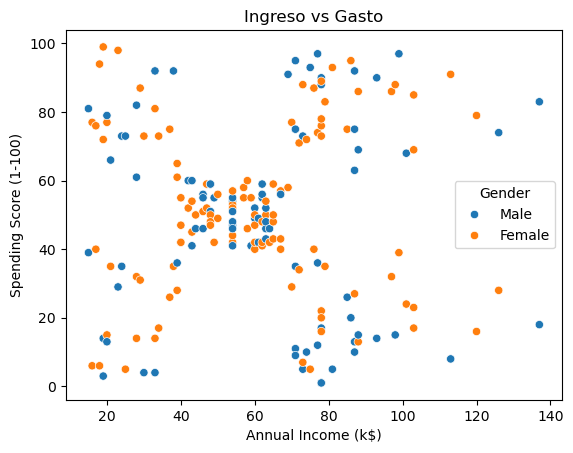

In [68]:
# Podemos ver la relación que hay entre ingreso y gasto
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, hue='Gender')
plt.title("Ingreso vs Gasto")
plt.show()

In [81]:
#No se encontraron  valores nulos, hay posibles agrupaciones visuales entre ingreso y gasto. No hay correlaciones fuertes, pero sí patrones visuales útiles para clustering.

In [83]:
# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Se Limpian los  espacios en los  nombres de columnas
dataset.columns = dataset.columns.str.strip()

# Se Eliminan las  columnas de ID si existe
if 'CustomerID' in dataset.columns:
    dataset = dataset.drop('CustomerID', axis=1)

# Verificamos  si las columnas se llaman 'Genre' o 'Gender'
if 'Genre' in dataset.columns:
    dataset['Genre'] = dataset['Genre'].map({'Male': 0, 'Female': 1})
elif 'Gender' in dataset.columns:
    dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

#los datos fueron limpiados y listos. El género ahora es numérico y se eliminó la columna que no aporta al clustering (CustomerID).

In [90]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
# Para clustering, usare solo estas dos variables:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

#Las variables que muestran patrones visuales claros y son ideales para agrupar clientes por comportamiento.


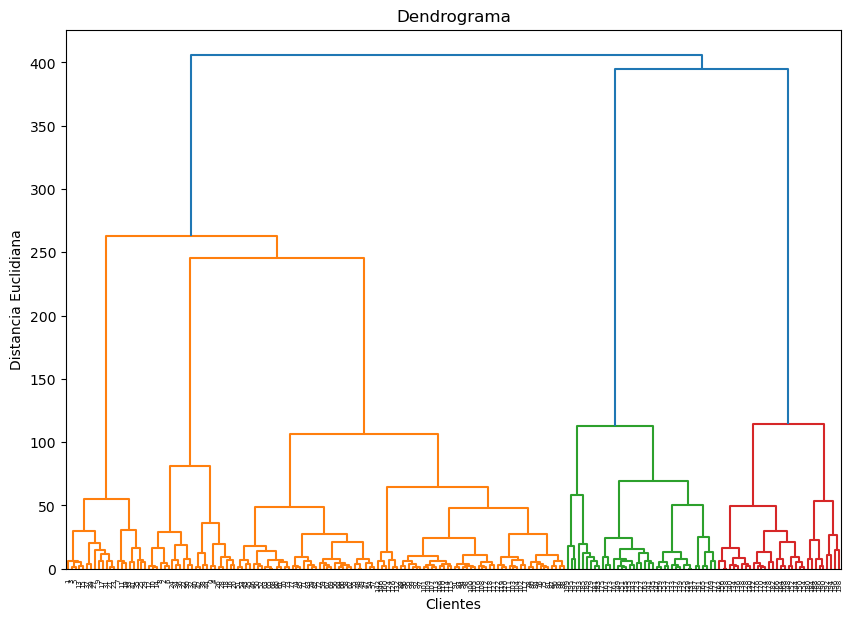

In [113]:
#4. Entrenar el modelo configurando los diferentes hiperparámetros.

from scipy.cluster.hierarchy import dendrogram, linkage

# Se Calculan las  linkage
linked = linkage(X, method='ward')

# Se Dibujan los  dendrogramas
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()



In [115]:
# Elegimos 5 clusters según el dendrograma
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_pred = model.fit_predict(X)



In [118]:
#5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = silhouette_score(X, y_pred)
calinski = calinski_harabasz_score(X, y_pred)

print(f"Coeficiente de Silhouette: {silhouette}")
print(f"Índice de Calinski-Harabasz: {calinski}")


Coeficiente de Silhouette: 0.5529945955148897
Índice de Calinski-Harabasz: 243.07142892964563


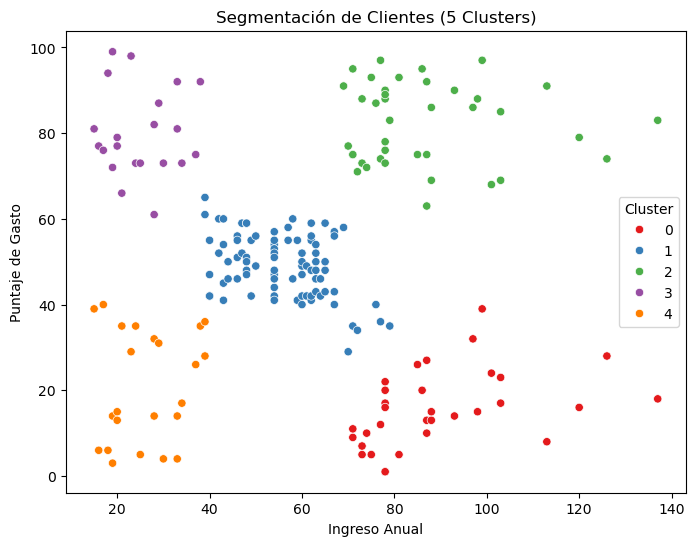

In [120]:
#6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=y_pred, palette="Set1")
plt.title("Segmentación de Clientes (5 Clusters)")
plt.xlabel("Ingreso Anual")
plt.ylabel("Puntaje de Gasto")
plt.legend(title='Cluster')
plt.show()


In [125]:
#7. Interpretar, analizar y documentar los resultados obtenidos.

#Las variables que  utilice , como el coeficiente de Silhouette y el índice de Calinski-Harabasz, indican una buena cohesión interna y separación entre clusters, lo cual valida la elección de 5 grupos.

#Grupo 0: Es el grupo que corresponde a los clientes con altos ingresos y alto puntaje de gasto.
#Geupo 1: Es el grupo que tiene ingresos medios y también gasta de forma moderada. Son los clientes equilibrados, no gastan mucho ni poco. Representan un grupo estable
#Grupo 2: Es el grupo que se encuentran las personas que tienen ingresos bajos, pero gastan bastante. Podrían ser jóvenes o personas que priorizan el consumo  aunque tengan menos dinero.
#Grupo 3: Es el grupo que corresponde a los  ingresos altos, pero gasta poco. Son personas muy cuidadosas al comprar o no ven valor en lo que se ofrece.
#Grupo 4: Es el grupo que corresponde a los clientes con bajos ingresos y bajo nivel de gasto. Es el grupo menos rentable. 